# Setup environment

In [1]:
# install openslide dependencies
!sudo apt-get install openslide-tools
!sudo apt-get install python-openslide
!pip install openslide-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libopenslide0
Suggested packages:
  libtiff-tools
The following NEW packages will be installed:
  libopenslide0 openslide-tools
0 upgraded, 2 newly installed, 0 to remove and 38 not upgraded.
Need to get 104 kB of archives.
After this operation, 297 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libopenslide0 amd64 3.4.1+dfsg-5build1 [89.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 openslide-tools amd64 3.4.1+dfsg-5build1 [13.8 kB]
Fetched 104 kB in 1s (129 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readli

In [2]:
# install flamingo and histogpt
!pip install flamingo-pytorch --no-deps
!pip install git+https://github.com/marrlab/HistoGPT

  Cloning https://github.com/marrlab/HistoGPT to /tmp/pip-req-build-i3bcxv9m
  Running command git clone --filter=blob:none --quiet https://github.com/marrlab/HistoGPT /tmp/pip-req-build-i3bcxv9m
  Resolved https://github.com/marrlab/HistoGPT to commit 743b53d5f40ced02442097a0f4be8f4cd6a7dbdd
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 960.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.5/257.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 27.4 MB/s eta 0:00:00
     ━━━━━━

In [3]:
# check whether to use a gpu or cpu
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# Download model

In [ ]:
# Here we use the small version of HistoGPT. To load the larger model, please see the first tutorial!

In [4]:
# download histogpt weights
!wget https://huggingface.co/marr-peng-lab/histogpt/resolve/main/histogpt-1b-6k-pruned.pth?download=true

--2024-03-18 15:57:15--  https://huggingface.co/marr-peng-lab/histogpt/resolve/main/histogpt-1b-6k-pruned.pth?download=true
Resolving huggingface.co (huggingface.co)... 18.172.134.124, 18.172.134.88, 18.172.134.4, ...
Connecting to huggingface.co (huggingface.co)|18.172.134.124|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.huggingface.co/repos/f6/8f/f68faf0906e39e8c3590cdbdd523457dc01bcea2a52d9de48cd7b06821eaac6a/16835f1069ffcfb5b379f3d1423fbf3d99a679d1b426e7b28c4604c8e1cd6956?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27histogpt-1b-6k-pruned.pth%3B+filename%3D%22histogpt-1b-6k-pruned.pth%22%3B&Expires=1711036635&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxMTAzNjYzNX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zL2Y2LzhmL2Y2OGZhZjA5MDZlMzllOGMzNTkwY2RiZGQ1MjM0NTdkYzAxYmNlYTJhNTJkOWRlNDhjZDdiMDY4MjFlYWFjNmEvMTY4MzVmMTA2OWZmY2ZiNWIzNzlmM2QxN

In [5]:
# download ctranspath weights
!wget https://huggingface.co/marr-peng-lab/histogpt/resolve/main/ctranspath.pth?download=true

--2024-03-18 15:57:38--  https://huggingface.co/marr-peng-lab/histogpt/resolve/main/ctranspath.pth?download=true
Resolving huggingface.co (huggingface.co)... 18.172.134.124, 18.172.134.88, 18.172.134.4, ...
Connecting to huggingface.co (huggingface.co)|18.172.134.124|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.huggingface.co/repos/f6/8f/f68faf0906e39e8c3590cdbdd523457dc01bcea2a52d9de48cd7b06821eaac6a/7c998680060c8743551a412583fac689db43cec07053b72dfec6dcd810113539?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27ctranspath.pth%3B+filename%3D%22ctranspath.pth%22%3B&Expires=1711036658&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxMTAzNjY1OH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zL2Y2LzhmL2Y2OGZhZjA5MDZlMzllOGMzNTkwY2RiZGQ1MjM0NTdkYzAxYmNlYTJhNTJkOWRlNDhjZDdiMDY4MjFlYWFjNmEvN2M5OTg2ODAwNjBjODc0MzU1MWE0MTI1ODNmYWM2ODlkYjQzY2VjMDcwNTNiNzJkZm

# Extract features

In [6]:
# download example slide
!wget https://huggingface.co/marr-peng-lab/histogpt/resolve/main/2023-03-06%2023.51.44.ndpi?download=true

--2024-03-18 15:57:55--  https://huggingface.co/marr-peng-lab/histogpt/resolve/main/2023-03-06%2023.51.44.ndpi?download=true
Resolving huggingface.co (huggingface.co)... 18.172.134.4, 18.172.134.24, 18.172.134.88, ...
Connecting to huggingface.co (huggingface.co)|18.172.134.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.huggingface.co/repos/f6/8f/f68faf0906e39e8c3590cdbdd523457dc01bcea2a52d9de48cd7b06821eaac6a/0e1fad3c726e6e12d362f40f694adb76b8b293dd3a2f35e7a07305cb574cb2ca?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%272023-03-06%252023.51.44.ndpi%3B+filename%3D%222023-03-06+23.51.44.ndpi%22%3B&Expires=1711036675&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxMTAzNjY3NX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zL2Y2LzhmL2Y2OGZhZjA5MDZlMzllOGMzNTkwY2RiZGQ1MjM0NTdkYzAxYmNlYTJhNTJkOWRlNDhjZDdiMDY4MjFlYWFjNmEvMGUxZmFkM2M3MjZlNmUxMmQzNjJmNDBmN

In [8]:
#patch and extract features
import os
import shutil
from histogpt.helpers.patching import main, PatchingConfigs

try:
  os.mkdir('/content/slide_folder')
  os.mkdir('/content/save_folder')
  shutil.move("/content/2023-03-06 23.51.44.ndpi?download=true", "/content/slide_folder/2023-03-06 23.51.44.ndpi")
except Exception:
  pass

configs = PatchingConfigs()
configs.slide_path = '/content/slide_folder'
configs.save_path = '/content/save_folder'
configs.model_path = '/content/ctranspath.pth?download=true'
configs.patch_size = 256
configs.white_thresh = [170, 185, 175]
configs.edge_threshold = 2
configs.resolution_in_mpp = 0.0
configs.downscaling_factor = 4.0
configs.batch_size = 16

main(configs)

2023-03-06 23.51.44_0:   0%|          | 0/61 [00:00<?, ?it/s]
                                                     

Time taken:  23.1379878570001 seconds


# Generate reports

In [9]:
# configure histogpt and load weights
from transformers import BioGptConfig
from histogpt.models import HistoGPTForCausalLM, PerceiverResamplerConfig

histogpt = HistoGPTForCausalLM(BioGptConfig(), PerceiverResamplerConfig())
histogpt = histogpt.to(device)

PATH = '/content/histogpt-1b-6k-pruned.pth?download=true'
state_dict = torch.load(PATH, map_location=device)
histogpt.load_state_dict(state_dict, strict=True)

<All keys matched successfully>

In [21]:
# get text prompt and image features
import h5py
from transformers import BioGptTokenizer

tokenizer = BioGptTokenizer.from_pretrained("microsoft/biogpt")

prompt = 'Final diagnosis:'
prompt = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0).to(device)

with h5py.File('/content/save_folder/h5_files/256px_ctranspath_0.0mpp_4.0xdown_normal/2023-03-06 23.51.44.h5', 'r') as f:
    features = f['feats'][:]
    features = torch.tensor(features).unsqueeze(0).to(device)

In [29]:
# generate text autoregressively
from histogpt.helpers.inference import generate

output = generate(
    model=histogpt,
    prompt=prompt,
    image=features,
    length=256,
    top_k=40,
    top_p=0.95,
    temp=0.7,
    device=device
)

decoded = tokenizer.decode(output[0, 1:])

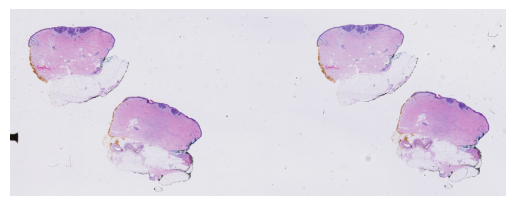

Final diagnosis: Basal cell carcinoma. Critical findings:
Superficial basal cell carcinoma. Tumor thickness 0. 3 mm. Exact
in toto. Microscopic findings: The epidermis shows a notable
reduction in larger areas, with small basaloid tumor strands
protruding into the upper corium at various locations. There is
a moderate inflammatory infiltrate in the surrounding area and
widened vascular lumina.


In [31]:
# view image and print text
from openslide import OpenSlide
from PIL import Image
import textwrap
import matplotlib.pyplot as plt

slide_path = '/content/slide_folder/2023-03-06 23.51.44.ndpi'
slide = OpenSlide(slide_path)

level = slide.get_best_level_for_downsample(32)
downsampled_dimensions = slide.level_dimensions[level]

thumbnail = slide.read_region((0,0), level, downsampled_dimensions)
thumbnail = thumbnail.convert("RGB")

plt.imshow(thumbnail)
plt.axis('off')
plt.show()

print(textwrap.fill(decoded, width=64))